In [1]:
import pandas as pd

# --- Charger le dataset complet ---
file = r"C:\Users\DELL\Desktop\project_fire\data\processed\dataset_final_cleanedFFFFFFFFF.csv"
df = pd.read_csv(file)
print("Dataset original :", df['fire'].value_counts(normalize=True))

# --- Séparer les classes ---
df_fire = df[df['fire'] == 1]   # feu
df_no_fire = df[df['fire'] == 0]  # pas de feu

# --- Calculer le nombre de samples nécessaires pour avoir 20% fire ---
n_fire = len(df_fire)
n_no_fire = int(n_fire * (80/20))  # pour avoir 20/80
print(f"Nombre de non-feu à garder : {n_no_fire}")

# --- Undersampling des non-feu ---
df_no_fire_sampled = df_no_fire.sample(n=n_no_fire, random_state=42)

# --- Combiner avec les données de feu ---
df_balanced = pd.concat([df_fire, df_no_fire_sampled]).sample(frac=1, random_state=42)  # shuffle

# --- Vérification du ratio ---
print("Dataset rééquilibré :", df_balanced['fire'].value_counts(normalize=True))

# --- Sauvegarde si nécessaire ---
output_file = r"C:\Users\DELL\Desktop\project_fire\data\processed\dataset_final_cleanedFFFFFFFFF_balanced.csv"
df_balanced.to_csv(output_file, index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5116\2208454583.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Dataset original : fire
0    0.99303
1    0.00697
Name: proportion, dtype: float64
Nombre de non-feu à garder : 50116
Dataset rééquilibré : fire
0    0.8
1    0.2
Name: proportion, dtype: float64


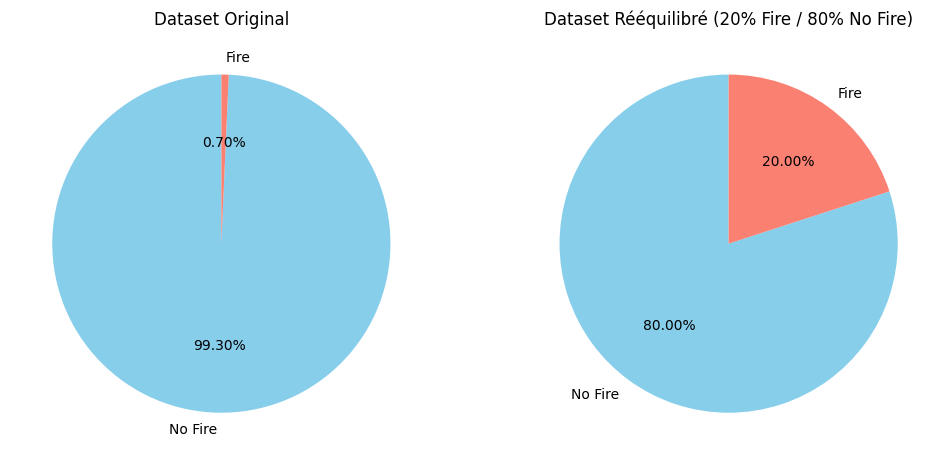

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Fichiers ---
file_original = r"C:\Users\DELL\Desktop\project_fire\data\processed\dataset_final_cleanedFFFFFFFFF.csv"
file_balanced = r"C:\Users\DELL\Desktop\project_fire\data\processed\dataset_final_cleanedFFFFFFFFF_balanced.csv"

# --- Fonction pour compter les classes en chunks ---
def count_fire_classes(file_path, chunk_size=500_000):
    count_fire = 0
    count_no_fire = 0
    for chunk in pd.read_csv(file_path, usecols=['fire'], chunksize=chunk_size):
        count_fire += (chunk['fire'] == 1).sum()
        count_no_fire += (chunk['fire'] == 0).sum()
    return pd.Series([count_no_fire, count_fire], index=['No Fire', 'Fire'])

# --- Comptage ---
counts_original = count_fire_classes(file_original)
counts_balanced = count_fire_classes(file_balanced)

# --- Visualisation avec pie chart ---
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Original
axes[0].pie(counts_original, labels=counts_original.index, autopct='%1.2f%%', startangle=90, colors=['skyblue','salmon'])
axes[0].set_title("Dataset Original")

# Rééquilibré
axes[1].pie(counts_balanced, labels=counts_balanced.index, autopct='%1.2f%%', startangle=90, colors=['skyblue','salmon'])
axes[1].set_title("Dataset Rééquilibré (20% Fire / 80% No Fire)")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("="*60)
print("SPLIT DATASET - 80% TRAINING / 20% TESTING")
print("="*60)

# ============================================================================
# 1. CHARGEMENT DU DATASET
# ============================================================================

print("\n📁 1. CHARGEMENT DU DATASET")
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed\\dataset_final_cleanedFFFFFFFFF_balanced.csv")

print(f"✅ Dataset chargé : {df.shape}")
print(f"✅ Nombre total d'observations : {len(df):,}")
print(f"✅ Nombre de colonnes : {len(df.columns)}")

# Afficher les premières lignes
print("\n📋 Aperçu des données :")
print(df.head())

# ============================================================================
# 2. VÉRIFICATION DE LA VARIABLE CIBLE
# ============================================================================

print("\n🎯 2. VÉRIFICATION DE LA VARIABLE CIBLE")

if 'fire' not in df.columns:
    print("❌ ERREUR : La colonne 'fire' n'existe pas")
    print("Colonnes disponibles :")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    exit()

# Distribution de la variable cible
target_dist = df['fire'].value_counts()
target_perc = df['fire'].value_counts(normalize=True) * 100

print(f"\n📊 DISTRIBUTION DE LA VARIABLE CIBLE 'fire' :")
print(f"   Classe 0 (Pas de feu) : {target_dist[0]:,} ({target_perc[0]:.1f}%)")
print(f"   Classe 1 (Feu)        : {target_dist[1]:,} ({target_perc[1]:.1f}%)")

# ============================================================================
# 3. PRÉPARATION DES DONNÉES
# ============================================================================

print("\n🔧 3. PRÉPARATION DES DONNÉES")

# Séparation features/target
X = df.drop('fire', axis=1)
y = df['fire']

print(f"✅ Features (X) : {X.shape}")
print(f"✅ Target (y)   : {y.shape}")

# Encodage des variables catégorielles (si présentes)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    print(f"\n🔤 Encodage des variables catégorielles ({len(categorical_cols)}) :")
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col].astype(str))
        print(f"   ✓ {col} : {len(le.classes_)} catégories encodées")
else:
    print("✅ Aucune variable catégorielle à encoder")

# ============================================================================
# 4. SPLIT 80% TRAINING / 20% TESTING
# ============================================================================

print("\n✂️ 4. SPLIT 80% TRAINING / 20% TESTING")

# Split avec stratification pour préserver la distribution des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # 20% pour le test
    train_size=0.8,         # 80% pour l'entraînement
    random_state=42,        # Pour la reproductibilité
    stratify=y,             # Préserver la proportion des classes
    shuffle=True            # Mélanger les données
)

print(f"✅ Split terminé avec succès !")

print(f"\n📊 TAILLES DES DATASETS :")
print(f"   Dataset original : {len(df):,} observations")
print(f"   Training set (80%) : {len(X_train):,} observations")
print(f"   Test set (20%)     : {len(X_test):,} observations")

print(f"\n📈 VÉRIFICATION DES PROPORTIONS :")
print(f"   Ratio training/test : {len(X_train)/len(df)*100:.1f}% / {len(X_test)/len(df)*100:.1f}%")

# ============================================================================
# 5. VÉRIFICATION DE LA DISTRIBUTION DES CLASSES
# ============================================================================

print("\n⚖️ 5. VÉRIFICATION DE LA DISTRIBUTION DES CLASSES")

# Distribution dans le training set
train_dist = y_train.value_counts()
train_perc = y_train.value_counts(normalize=True) * 100

# Distribution dans le test set
test_dist = y_test.value_counts()
test_perc = y_test.value_counts(normalize=True) * 100

print("\n📊 TRAINING SET (80%) :")
print(f"   Classe 0 : {train_dist[0]:,} ({train_perc[0]:.1f}%)")
print(f"   Classe 1 : {train_dist[1]:,} ({train_perc[1]:.1f}%)")

print("\n📊 TEST SET (20%) :")
print(f"   Classe 0 : {test_dist[0]:,} ({test_perc[0]:.1f}%)")
print(f"   Classe 1 : {test_dist[1]:,} ({test_perc[1]:.1f}%)")

print("\n✅ VÉRIFICATION : La distribution est préservée dans les deux sets")

# ============================================================================
# 6. NORMALISATION DES DONNÉES (Optionnel mais recommandé)
# ============================================================================

print("\n📏 6. NORMALISATION DES DONNÉES (StandardScaler)")

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser les features d'entraînement
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Normaliser les features de test avec les mêmes paramètres
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✅ Normalisation terminée")
print("   Note : Le scaler est ajusté sur le training set seulement")
print("   pour éviter la fuite d'information")

# Vérification des statistiques après normalisation
print("\n📊 STATISTIQUES APRÈS NORMALISATION (training set) :")
print(f"   Moyenne ≈ 0 : {X_train_scaled.mean().mean():.6f}")
print(f"   Écart-type ≈ 1 : {X_train_scaled.std().mean():.6f}")

# ============================================================================
# 7. SAUVEGARDE DES DATASETS
# ============================================================================

print("\n💾 7. SAUVEGARDE DES DATASETS")

import os

# Créer le dossier de sauvegarde
save_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\split_80_20"
os.makedirs(save_dir, exist_ok=True)

# Sauvegarder les datasets
datasets = {
    'X_train': X_train_scaled,
    'y_train': y_train,
    'X_test': X_test_scaled,
    'y_test': y_test
}

for name, data in datasets.items():
    filepath = f"{save_dir}\\{name}.csv"
    if isinstance(data, pd.DataFrame):
        data.to_csv(filepath, index=False)
    else:
        # Pour les Series y_train et y_test
        pd.DataFrame(data).to_csv(filepath, index=False, header=['fire'])
    
    print(f"✅ {name} sauvegardé : {filepath}")

# Sauvegarder aussi les données non normalisées (au cas où)
X_train.to_csv(f"{save_dir}\\X_train_raw.csv", index=False)
X_test.to_csv(f"{save_dir}\\X_test_raw.csv", index=False)

print(f"\n✅ Tous les datasets ont été sauvegardés dans : {save_dir}")

# ============================================================================
# 8. RAPPORT FINAL
# ============================================================================

print("\n" + "="*60)
print("📋 RAPPORT FINAL DU SPLIT")
print("="*60)

print(f"\n📊 RÉSUMÉ DES TAILLES :")
print(f"   Dataset original : {len(df):,} observations × {len(df.columns)} colonnes")
print(f"   Training set     : {len(X_train):,} observations × {len(X_train.columns)} colonnes")
print(f"   Test set         : {len(X_test):,} observations × {len(X_test.columns)} colonnes")

print(f"\n📈 RATIOS :")
print(f"   Training / Total : {len(X_train)/len(df)*100:.1f}%")
print(f"   Test / Total     : {len(X_test)/len(df)*100:.1f}%")

print(f"\n🎯 DISTRIBUTION DES CLASSES :")
print(f"   Original - Classe 1 : {target_perc[1]:.1f}%")
print(f"   Training - Classe 1 : {train_perc[1]:.1f}%")
print(f"   Test     - Classe 1 : {test_perc[1]:.1f}%")

print(f"\n✅ Split 80/20 terminé avec succès !")
print(f"📁 Données sauvegardées dans : {save_dir}")

# ============================================================================
# 9. CODE POUR CHARGER LES DONNÉES PLUS TARD
# ============================================================================

print("\n" + "="*60)
print("💻 CODE POUR CHARGER LES DONNÉES PLUS TARD")
print("="*60)

load_code = """
# Pour charger les datasets plus tard :
import pandas as pd

# Chemin des données
data_dir = "C:\\\\Users\\\\DELL\\\\Desktop\\\\project_fire\\\\data\\\\split_80_20"

# Chargement
X_train = pd.read_csv(f"{data_dir}\\\\X_train.csv")
y_train = pd.read_csv(f"{data_dir}\\\\y_train.csv")['fire']
X_test = pd.read_csv(f"{data_dir}\\\\X_test.csv")
y_test = pd.read_csv(f"{data_dir}\\\\y_test.csv")['fire']

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_test  : {y_test.shape}")
"""

print(load_code)